In [1]:
from coupled_dipole_model import DipoleParameters
from coupled_dipole_model import CalculateCrossSections
import numpy as np
import matplotlib.pyplot as plt
hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]

num = 2

ylength=50
zlength=70
gapy=0
gapz=10
pol='z'

n=1.0
wp=8.959/hbar_eVs
eps_inf=9.695 
gam_drude=0.073/hbar_eVs


def make_input(ylength, zlength, gapy, gapz, pol):
    if gapz == 0: whichgap = 'y'; gaplen=gapy
    if gapy == 0: whichgap = 'z'; gaplen=gapz
    def_centers = np.zeros((num, 3))
    def_orient = np.zeros((num, 3))
    def_all_radii = np.zeros((num, 2))
    if whichgap == 'z':
        def_centers[0,:] = np.array([ 0, 0, -zlength-gapz/2 ])*1.E-7
        def_centers[1,:] = np.array([ 0,  0, zlength+gapz/2 ])*1.E-7
        filename = str('twoprolates_homo_')+str(ylength)+str('_')+str(zlength) + str('_z')+str(gapz)
    if whichgap == 'y':
        def_centers[0,:] = np.array([ 0, -ylength-gapy/2, 0 ])*1.E-7
        def_centers[1,:] = np.array([ 0,  ylength+gapy/2, 0 ])*1.E-7
        filename = str('twoprolates_homo_')+str(ylength)+str('_')+str(zlength) + str('_y')+str(gapy)
    def_orient[0, :] = np.array([0, 0, 1])
    def_orient[1, :] = np.array([0, 0, 1])
    def_all_radii[0, :] = np.array([zlength, ylength])*1.E-7
    def_all_radii[1, :] = np.array([zlength, ylength])*1.E-7
    return def_centers, def_orient, def_all_radii, filename

def_centers, def_orients, def_all_radii, filename = make_input(ylength=ylength, 
                                                               zlength=zlength, 
                                                               gapy=gapy,
                                                               gapz=gapz, 
                                                               pol=pol)

##  Writes Code to File

In [2]:
calc_dips = CalculateCrossSections(centers=def_centers, 
                                   orient=def_orients,
                                   all_radii=def_all_radii,
                                   num=num,
                                   n=n, 
                                   wp=wp, 
                                   eps_inf=eps_inf, 
                                   gam_drude=gam_drude)

def write_datafiles():
    ''' Writes dressed alpha of each particle'''
    def_centers, def_orients, def_all_radii, filename = make_input(ylength=ylength, 
                                                                   zlength=zlength, 
                                                                   gapy=gapy,
                                                                   gapz=gapz, 
                                                                   pol=pol)
    w = np.arange(0.5,2.5,.01)/hbar_eVs
    write_file = np.zeros((1+3*num*3*num+2, len(w)),dtype=complex)
    invA_tilde_w = np.zeros((3*num, 3*num, len(w)),dtype=complex)
    for i in range(0,len(w)):
        invA_tilde_w[:,:,i] = np.linalg.inv(calc_dips.A_tilde(w=w[i]))
    # Hardcoded for two particles
    write_file[0,0:3] = def_centers[0,:]; write_file[1,0:3] = def_centers[1,:]
    write_file[0,3:6] = def_orients[0,:];  write_file[1,3:6] = def_orients[1,:];
    write_file[0,6:8] = def_all_radii[0,:]; write_file[1,6:8] = def_all_radii[1,:]; 
    write_file[2,:] = w*hbar_eVs
    count=3
    for i in range(0, 3*num):
        for j in range(0, 3*num):
            write_file[count, :] = invA_tilde_w[i,j,:]
            count=count+1
    np.savetxt(str('../troubleshooting/')+str(filename)+str('.txt'), write_file, fmt="%2.5E")
write_datafiles()

## Plot Analytics and Simulation

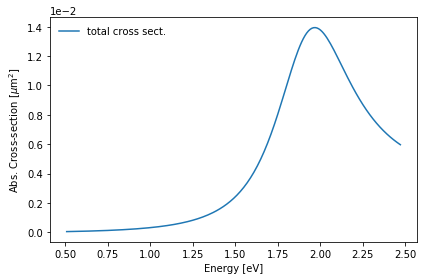

In [6]:
def plot_simulation(filename):
    def_centers, def_orients, def_all_radii, filename = make_input(ylength=ylength, 
                                                                   zlength=zlength, 
                                                                   gapy=gapy,
                                                                   gapz=gapz, 
                                                                   pol=pol)
    data = np.loadtxt(filename,skiprows=1)
    energy = data[:,0]
    ext_cross = data[:,1]
    abs_cross = data[:,2]
    sca_cross = data[:,3]
    plt.plot(energy, abs_cross, 'r',alpha=.5,label='simulation')

def load_fromfile():
    def_centers, def_orients, def_all_radii, filename = make_input(ylength=ylength, 
                                                                   zlength=zlength, 
                                                                   gapy=gapy,
                                                                   gapz=gapz, 
                                                                   pol=pol)
    data =  open(str('../troubleshooting/')+str(filename)+str('.txt'),"r")
    data.readline()
    data.readline()
    omega         = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde = np.zeros((3*num, 3*num, len(omega)),dtype=complex)
    omega_all = np.zeros(len(omega),dtype=complex)
    alpha_tilde00 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde01 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde02 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde03 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde04 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde05 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde10 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde11 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde12 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde13 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde14 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde15 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde20 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde21 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde22 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde23 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde24 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde25 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde30 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde31 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde32 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde33 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde34 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde35 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde40 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde41 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde42 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde43 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde44 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde45 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde50 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde51 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde52 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde53 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde54 = data.readline().split(" ")[1::2][:-1][1:-1]
    alpha_tilde55 = data.readline().split(" ")[1::2][:-1][1:-1]

    for col in range(0, len(alpha_tilde00)):
        omega_all[col] = complex(omega[col])
        alpha_tilde[0,0,col] = complex(alpha_tilde00[col])
        alpha_tilde[0,1,col] = complex(alpha_tilde01[col])
        alpha_tilde[0,2,col] = complex(alpha_tilde02[col])
        alpha_tilde[0,3,col] = complex(alpha_tilde03[col])
        alpha_tilde[0,4,col] = complex(alpha_tilde04[col])
        alpha_tilde[0,5,col] = complex(alpha_tilde05[col])
        alpha_tilde[1,0,col] = complex(alpha_tilde10[col])
        alpha_tilde[1,1,col] = complex(alpha_tilde11[col])
        alpha_tilde[1,2,col] = complex(alpha_tilde12[col])
        alpha_tilde[1,3,col] = complex(alpha_tilde13[col])
        alpha_tilde[1,4,col] = complex(alpha_tilde14[col])
        alpha_tilde[1,5,col] = complex(alpha_tilde15[col])
        alpha_tilde[2,0,col] = complex(alpha_tilde20[col])
        alpha_tilde[2,1,col] = complex(alpha_tilde21[col])
        alpha_tilde[2,2,col] = complex(alpha_tilde22[col])
        alpha_tilde[2,3,col] = complex(alpha_tilde23[col])
        alpha_tilde[2,4,col] = complex(alpha_tilde24[col])
        alpha_tilde[2,5,col] = complex(alpha_tilde25[col])
        alpha_tilde[3,0,col] = complex(alpha_tilde30[col])
        alpha_tilde[3,1,col] = complex(alpha_tilde31[col])
        alpha_tilde[3,2,col] = complex(alpha_tilde32[col])
        alpha_tilde[3,3,col] = complex(alpha_tilde33[col])
        alpha_tilde[3,4,col] = complex(alpha_tilde34[col])
        alpha_tilde[3,5,col] = complex(alpha_tilde35[col])
        alpha_tilde[4,0,col] = complex(alpha_tilde40[col])
        alpha_tilde[4,1,col] = complex(alpha_tilde41[col])
        alpha_tilde[4,2,col] = complex(alpha_tilde42[col])
        alpha_tilde[4,3,col] = complex(alpha_tilde43[col])
        alpha_tilde[4,4,col] = complex(alpha_tilde44[col])
        alpha_tilde[4,5,col] = complex(alpha_tilde45[col])
        alpha_tilde[5,0,col] = complex(alpha_tilde50[col])
        alpha_tilde[5,1,col] = complex(alpha_tilde51[col])
        alpha_tilde[5,2,col] = complex(alpha_tilde52[col])
        alpha_tilde[5,3,col] = complex(alpha_tilde53[col])
        alpha_tilde[5,4,col] = complex(alpha_tilde54[col])
        alpha_tilde[5,5,col] = complex(alpha_tilde55[col])
    return omega_all, alpha_tilde

def plot_fromfile():
    omega, alpha_tilde = load_fromfile()
    def_centers, def_orients, def_all_radii, filename = make_input(ylength=ylength, 
                                                               zlength=zlength, 
                                                               gapy=gapy,
                                                               gapz=gapz, 
                                                               pol=pol)
    k = np.real(omega/hbar_eVs/c)
    E0_tilde = np.zeros((3*num, 1))
    P_tilde = np.zeros((3*num, 1),dtype=complex)
    P_each = np.zeros((3, num),dtype=complex)
    E_each = np.zeros((3, num),dtype=complex)
    Cext_each = np.zeros((num, len(omega)))
    Csca_each = np.zeros((num, len(omega)))

    for i in range(0, num):
        if pol == 'z':
            E0_tilde[3*i,:] = 0; E0_tilde[3*i+1,:] = 0; E0_tilde[3*i+2,:] = 1
        if pol == 'y':
            E0_tilde[3*i,:] = 0; E0_tilde[3*i+1,:] = 1; E0_tilde[3*i+2,:] = 0
    for wave in range(0, len(omega)):
        P_tilde = np.matmul(alpha_tilde[:,:,wave], E0_tilde)
        for i in range(0, num):
            # Evaluate the cross sections of each particle separately
            dip_params = DipoleParameters(def_centers, def_orients, def_all_radii, n, wp, eps_inf, gam_drude)
            P_each[:,i] = P_tilde[3*i:3*(i+1), 0]
            E_each[0,i] = dip_params.alpha(w=np.real(omega[wave]/hbar_eVs), radius=def_all_radii[i, :],kind='prolate_alongshort')**(-1)*P_each[0,i]
            E_each[1,i] = dip_params.alpha(w=np.real(omega[wave]/hbar_eVs), radius=def_all_radii[i, :],kind='prolate_alongshort')**(-1)*P_each[1,i]
            E_each[2,i] = dip_params.alpha(w=np.real(omega[wave]/hbar_eVs), radius=def_all_radii[i, :],kind='prolate_alonglong')**(-1)*P_each[2,i]

            Cext_each[i, wave] = 4*np.pi*k[wave]*np.imag( np.sum( P_each[:,i]*np.conj(E_each[:,i])) ) *10**8
            Csca_each[i, wave] = 4*np.pi*k[wave]*2/3*k[wave]**3*np.real( np.sum(P_each[:,i]*np.conj(P_each[:,i])) ) *10**8  
    Cabs_each = Cext_each - Csca_each
    plt.plot(np.real(omega), np.sum(Cabs_each, axis=0), label='total cross sect.')

    plt.xlabel('Energy [eV]')
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ylabel('Abs. Cross-section [$\mu$m$^2$]')
    plt.tight_layout()
    plt.legend(frameon=False,loc='upper left')
    plt.show()
plot_fromfile()


## Mass produce data files

In [4]:
def write_em_all():
    for zlength in range(70,80, 10):
        for gapy in range(20, 60, 10):

            ylength=50
            gapz = 0

            def_centers = np.zeros((N, 3))
            def_orient = np.zeros((N, 3))
            def_all_radii = np.zeros((N, 2))

            if gapy == 0:
                def_centers[0,:] = np.array([ 0, 0, -zlength-gapz/2 ])*1.E-7
                def_centers[1,:] = np.array([ 0,  0, zlength+gapz/2 ])*1.E-7
            if gapz == 0:
                def_centers[0,:] = np.array([ 0, -ylength-gapy/2, 0 ])*1.E-7
                def_centers[1,:] = np.array([ 0,  ylength+gapy/2, 0 ])*1.E-7

            def_all_radii[0, :] = np.array([zlength, ylength])*1.E-7
            def_all_radii[1, :] = np.array([zlength, ylength])*1.E-7
        
            def_orient[0, :] = np.array([0, 0, 1])
            def_orient[1, :] = np.array([0, 0, 1])

            calc_abs = CalculateCrossSections(def_centers, def_orient, def_all_radii)

            if gapz == 0:
                name = str('twoprolates_homo_')+str(ylength)+str('_')+str(zlength) + str('_y')+str(gapy)
            if gapy == 0:
                name = str('twoprolates_homo_')+str(ylength)+str('_')+str(zlength) + str('_z')+str(gapz)

            print('writing ', name)
            calc_abs.write_datafiles(filename=name)

    plt.show()


def check():
    ylength = 50
    zlength = 70

    gapz = 0
    gapy = 20

    pol = 'z'

    if gapz == 0:
        whichgap = 'y'
        gaplen=gapy

    if gapy == 0:
        whichgap = 'z'
        gaplen=gapz

    def_centers = np.zeros((N, 3))
    def_orient = np.zeros((N, 3))
    def_all_radii = np.zeros((N, 2))

    if whichgap == 'z':
        def_centers[0,:] = np.array([ 0, 0, -zlength-gapz/2 ])*1.E-7
        def_centers[1,:] = np.array([ 0,  0, zlength+gapz/2 ])*1.E-7
    if whichgap == 'y':
        def_centers[0,:] = np.array([ 0, -ylength-gapy/2, 0 ])*1.E-7
        def_centers[1,:] = np.array([ 0,  ylength+gapy/2, 0 ])*1.E-7

    def_orient[0, :] = np.array([0, 0, 1])
    def_orient[1, :] = np.array([0, 0, 1])

    def_all_radii[0, :] = np.array([zlength, ylength])*1.E-7
    def_all_radii[1, :] = np.array([zlength, ylength])*1.E-7

    test = CalculateCrossSections(def_centers, def_orient, def_all_radii)

    if pol == 'z':
        drive =np.array([0,0,1])
    if pol == 'y':
        drive =np.array([0,1,0])


    name = str('twoprolates_homo_')+str(ylength)+str('_')+str(zlength) + str('_y')+str(gapy)

    test.write_datafiles(filename=name)


    # test.plot_fromfile(filename=name, drive=drive)
    # print('check sim ', str(ylength)+str('_')+str(zlength)+str('_')+str(whichgap)+str(gaplen)+str('_pol')+str(pol))

    # sim_file = str('../check_with_simulation/simulated_spectra/two_ellipsoids/Spectrum_bemret_homo_')+str(ylength)+str('_')+str(zlength)+str('_')+str(whichgap)+str(gaplen)+str('_pol')+str(pol)
    # test.plot_twospectra(filename=sim_file)

    # plt.xlim([.5, 3])
    # plt.legend()
    plt.show()

N = 2 # number of particles

# check()